<a href="https://colab.research.google.com/github/Noahkandie/Mental-health-technology-project/blob/main/Mental_Health_in_Technology_Industry_Project_(Jabari_A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Data and Reading data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url='/content/OSMI 2020 Mental Health in Tech Survey Results.csv'
df=pd.read_csv(url)

# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 120 entries, # to What US state or territory do you *work* in?
dtypes: float64(33), int64(9), object(78)
memory usage: 168.9+ KB


In [ ]:
df.shape

(180, 120)

*  The dataset is a survey in 2020 that contains 120 columns
*  The data is from Open Sourcing Mental Illness, a non-profit corporation deddcated to create awareness and educate on mental illness in our community.



In [ ]:
df.isnull().sum().count()

120

# Data Cleaning

Based on our objective, the following columns were dropped:

In [ ]:
df.drop(columns=["#","How many employees does your company or organization have?",'Why or why not?','Other', 'Other.1', 'Other.2', 'Other.3',
"Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?","Would you feel more comfortable talking to your coworkers about your physical health or your mental health?",
"Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?","Have you ever discussed your mental health with your employer?","Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",
"Would you feel comfortable discussing a mental health issue with your coworkers?","Have you ever discussed your mental health with coworkers?","Describe the conversation with coworkers you had about your mental health including their reactions.","Have you ever had a coworker discuss their or another coworker's mental health with you?","Describe the conversation your coworker had with you about their mental health (please do not use names).",
"Do you know local or online resources to seek help for a mental health issue?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?",
"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',"If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?","Do you believe your productivity is ever affected by a mental health issue?","If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",
"*Do you have previous employers?*","Was your employer primarily a tech company/organization?","Have your previous employers provided mental health benefits?","Were you aware of the options for mental health care provided by your previous employers?","Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?","Did your previous employers provide resources to learn more about mental health disorders and how to seek help?",
"Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?","Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?","Would you have been willing to discuss your mental health with your direct supervisor(s)?","Did you ever discuss your mental health with your previous employer?","Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",
"Would you have been willing to discuss your mental health with your coworkers at previous employers?","Did you ever discuss your mental health with a previous coworker(s)?","Describe the conversation you had with your previous coworkers about your mental health including their reactions.","Did you ever have a previous coworker discuss their or another coworker's mental health with you?","Describe the conversation your coworker had with you about their mental health (please do not use names)..1","Overall, how much importance did your previous employer place on physical health?","Overall, how much importance did your previous employer place on mental health?","What US state or territory do you *work* in?","If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.","Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)"],inplace=True)
df.head(1)

,*Are you self-employed?*,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?","Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you *currently* have a mental health disorder?,Have you ever been *diagnosed* with a mental health disorder?,"Anxiety Disorder (Generalized, Social, Phobia, etc)","Mood Disorder (Depression, Bipolar Disorder, etc)","Psychotic Disorder (Schizophrenia, Schizoaffective, etc)","Eating Disorder (Anorexia, Bulimia, etc)",Attention Deficit Hyperactivity Disorder,"Personality Disorder (Borderline, Antisocial, Paranoid, etc)",Obsessive-Compulsive Disorder,Post-Traumatic Stress Disorder,Stress Response Syndromes,Dissociative Disorder,Substance Use Disorder,Addictive Disorder,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Post-traumatic Stress Disorder,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,"Anxiety Disorder (Generalized, Social, Phobia, etc).2","Mood Disorder (Depression, Bipolar Disorder, etc).2","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2","Eating Disorder (Anorexia, Bulimia, etc).2",Attention Deficit Hyperactivity Disorder.2,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).2",Obsessive-Compulsive Disorder.2,Post-traumatic Stress Disorder.1,Stress Response Syndromes.2,Dissociative Disorder.2,Substance Use Disorder.2,Addictive Disorder.2,Have you had a mental health disorder in the past?,Have you ever sought treatment for a mental health disorder from a mental health professional?,Do you have a family history of mental illness?,"If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*","If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*",Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,How willing would you be to share with friends and family that you have a mental illness?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your *mental* health with a potential employer in an interview?,Why or why not?.1,Are you openly identified at work as a person with a mental health issue?,Has being identified as a person with a mental health issue affected your career?,How has it affected your career?,"If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?",Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?,Describe the circumstances of the badly handled or unsupportive response.,Have you observed or experienced a *supportive or well handled response* to a mental health iss

In [ ]:
df.shape

(180, 74)

In [ ]:
df.rename(columns={'*Are you self-employed?*':'employment_status','Do you know the options for mental health care available under your employer-provided health coverage?':'benefits',"Is your employer primarily a tech company/organization?":"tech_company","Is your primary role within your company related to tech/IT?":"primary_role","Does your employer provide mental health benefits as part of healthcare coverage?":"benefits","Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?":"discussed_mh","Does your employer offer resources to learn more about mental health disorders and options for seeking help?":"resources",
"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?":"leave","Overall, how much importance does your employer place on physical health?":"employer_ph","Overall, how much importance does your employer place on mental health?":"employer_mh_importance",
"Do you *currently* have a mental health disorder?":"mh_current","Have you ever been *diagnosed* with a mental health disorder?":"diagnosis_mh","*What disorder(s) have you been diagnosed with?*":"disorders_diagnosed","*If possibly, what disorder(s) do you believe you have?*":"disorder_believe","Have you had a mental health disorder in the past?":"past_disorders","Have you ever sought treatment for a mental health disorder from a mental health professional?":"sought_treatment","Do you have a family history of mental illness?":"family_history","If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*":"how often do you feel that it interferes with your work when being treated effectively","If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*":"how often do you feel that it interferes with your work when not being treated effectively","Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?":"observations who discussed a mental health made you less likely to reveal a mental in your current workplace",
"How wilm ling would you be to share with friends and family that you have a mental illness?":"family_mh","Would you be willing to bring up a physical health issue with a potential employer in an interview?":"bring up a physical health issue with a potential employer in an interview","Why or why not?":"Why or why not","Would you bring up your *mental* health with a potential employer in an interview?":"bring up your mental health with a potential employer in an interview","Why or why not?.1":"Why or why not","Are you openly identified at work as a person with a mental health issue?":"identify_work_mh","Has being identified as a person with a mental health issue affected your career?":"mh_career","How has it affected your career?":"affect_areer",
"If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?":"coworker_react","Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?":"well_handled_response","What is your age?":"age","What is your gender?":"gender","What country do you *live* in?":"country","What US state or territory do you *live* in?":"state","What is your race?":"race","What country do you *work* in?":"country_work"},inplace=True)
df.head(1)

,employment_status,tech_company,primary_role,benefits,benefits,discussed_mh,resources,leave,employer_ph,employer_mh_importance,mh_current,diagnosis_mh,"Anxiety Disorder (Generalized, Social, Phobia, etc)","Mood Disorder (Depression, Bipolar Disorder, etc)","Psychotic Disorder (Schizophrenia, Schizoaffective, etc)","Eating Disorder (Anorexia, Bulimia, etc)",Attention Deficit Hyperactivity Disorder,"Personality Disorder (Borderline, Antisocial, Paranoid, etc)",Obsessive-Compulsive Disorder,Post-Traumatic Stress Disorder,Stress Response Syndromes,Dissociative Disorder,Substance Use Disorder,Addictive Disorder,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Post-traumatic Stress Disorder,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,"Anxiety Disorder (Generalized, Social, Phobia, etc).2","Mood Disorder (Depression, Bipolar Disorder, etc).2","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2","Eating Disorder (Anorexia, Bulimia, etc).2",Attention Deficit Hyperactivity Disorder.2,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).2",Obsessive-Compulsive Disorder.2,Post-traumatic Stress Disorder.1,Stress Response Syndromes.2,Dissociative Disorder.2,Substance Use Disorder.2,Addictive Disorder.2,past_disorders,sought_treatment,family_history,how often do you feel that it interferes with your work when being treated effectively,how often do you feel that it interferes with your work when not being treated effectively,observations who discussed a mental health made you less likely to reveal a mental in your current workplace,How willing would you be to share with friends and family that you have a mental illness?,bring up a physical health issue with a potential employer in an interview,bring up your mental health with a potential employer in an interview,Why or why not,identify_work_mh,mh_career,affect_areer,coworker_react,Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?,Describe the circumstances of the badly handled or unsupportive response.,well_handled_response,Describe the circumstances of the supportive or well handled response.,"Overall, how well do you think the tech industry supports employees with mental health issues?",Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,age,gender,country,state,race,country_work
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Don't Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Don't Know,0,Yes,Not applicable to me,Sometimes,NaN,5,Maybe,Maybe,Same reason. But I believe this would have a g...,0,NaN,NaN,5,Maybe/Not sure,NaN,"Yes, I experienced",NaN,2,NaN,45,Male,United States of America,Connecticut,White,United States of America


In [ ]:
df['gender'].unique()

array(['Male', 'female', 'Female', 'F', 'f', nan, 'male', 'mail', 'M',
       'm', 'Woman', 'FEMALE', 'female, she/her', 'mostly male',
       'cisgender male', 'MAle'], dtype=object)

In [ ]:
# cleaning gender column
df['gender']=np.where(df['gender'] =='male','Male', df['gender'])
df['gender']=np.where(df['gender'] =='m', 'Male', df['gender'])
df['gender']=np.where(df['gender'] =='M', 'Male', df['gender'])
df['gender']=np.where(df['gender'] =='Male ','Male', df['gender'])
df['gender']=np.where(df['gender'] =='mail','Male', df['gender'])
df['gender']=np.where(df['gender'] =='MALE','Male', df['gender'])
df['gender']=np.where(df['gender'] =='MAle','Male', df['gender'])
df['gender']=np.where(df['gender'] =='cisgender male','Male', df['gender'])
df['gender']=np.where(df['gender'] =='mostly male','Male', df['gender'])

df['gender']=np.where(df['gender']=='female','Female',df['gender'])
df['gender']=np.where(df['gender']=='f','Female',df['gender'])
df['gender']=np.where(df['gender']=='F','Female',df['gender'])
df['gender']=np.where(df['gender']=='FEMALE','Female',df['gender'])
df['gender']=np.where(df['gender']=='Non-binary','Female',df['gender'])
df['gender']=np.where(df['gender']=='cis woman','Female',df['gender'])
df['gender']=np.where(df['gender']=='woman','Female',df['gender'])

df['gender']=np.where(df['gender']=='female, she/her','Female',df['gender'])
df['gender']=np.where(df['gender']=='Female','Female',df['gender'])
df['gender']=np.where(df['gender']=='Female','Woman',df['gender'])

In [ ]:
df['gender'].value_counts()

Male     116
Woman     62
Name: gender, dtype: int64

In [ ]:
df['race'].unique()

array(['White', nan, 'Asian', 'More than one of the above',
       'I prefer not to answer', 'Black or African American'],
      dtype=object)

# Data Analysis

In [ ]:
df['country'].value_counts()

United States of America    65
India                       33
Canada                      11
United Kingdom               7
Brazil                       7
Spain                        6
Australia                    5
Germany                      5
Netherlands                  5
Philippines                  3
South Africa                 2
Ireland                      2
Indonesia                    2
Turkey                       2
Russia                       2
France                       2
Sri Lanka                    2
Poland                       2
Sweden                       2
Mongolia                     2
Egypt                        1
Colombia                     1
Malaysia                     1
Serbia                       1
Japan                        1
Cameroon                     1
Pakistan                     1
Taiwan                       1
Portugal                     1
Bangladesh                   1
Iceland                      1
Ukraine                      1
Chile   

**Which mental health disorder has the highest prevalence in the technology industry?**

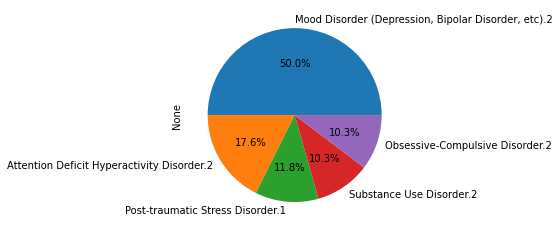

In [ ]:
df.drop(df.iloc[:,13:37], axis=1, inplace=True)
df.iloc[:, 12:24].count().sort_values(ascending=False).head().plot.pie(y='mental health disorder has the highest prevalence in the technology industry',autopct="%0.1f%%")

In [ ]:
# Fill in more NaN values
column_list = df.isna().sum()[df.isna().sum() > 1].index

for column in column_list:
    df.loc[:,column].fillna("Unknown",inplace=True)

df.isnull().sum().any()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


True

**What states have the highest prevalence of mental disorders in the US?**

In [ ]:
#selcecting data only for US
us_df = df[df['country'] =='United States of America'] 

In [ ]:
# checking the value count of the unique values in the column
us_df['diagnosis_mh'].value_counts()

Yes    26
Name: diagnosis_mh, dtype: int64

In [ ]:
#What states have the highest prevalence of mental disorders in the US?
us_df[us_df['diagnosis_mh'] =='Yes'].groupby('state')['state'].count().sort_values(ascending= False)

state
New York        5
Washington      3
Wisconsin       2
Illinois        2
Georgia         2
California      2
Utah            1
Tennessee       1
South Dakota    1
Minnesota       1
Michigan        1
Maryland        1
Indiana         1
Florida         1
Colorado        1
Arizona         1
Name: state, dtype: int64

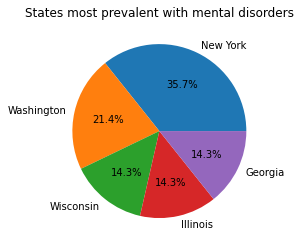

In [ ]:
# Ploting the states most prevalent with mental disorders in the US
us_df[us_df['diagnosis_mh'] =='Yes'].groupby('state')['state'].count().sort_values(ascending= False).head().plot.pie(y='diagnosis_mh',autopct="%0.1f%%")
plt.title('States most prevalent with mental disorders')
plt.axis('off')
plt.show()

**What gender has been the most affected by mental illness in the US?**

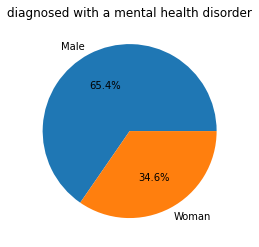

In [ ]:
us_df[us_df['diagnosis_mh'] =='Yes'].groupby('gender')['gender'].count().sort_values(ascending= False).head().plot.pie(y='diagnosis_mh',autopct="%0.1f%%")
plt.title('diagnosed with a mental health disorder')
plt.axis('off')
plt.show()

WOMEN: were 36.6% less likely to be affected by mental illness compared to 65.4% of MALES who were affected


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


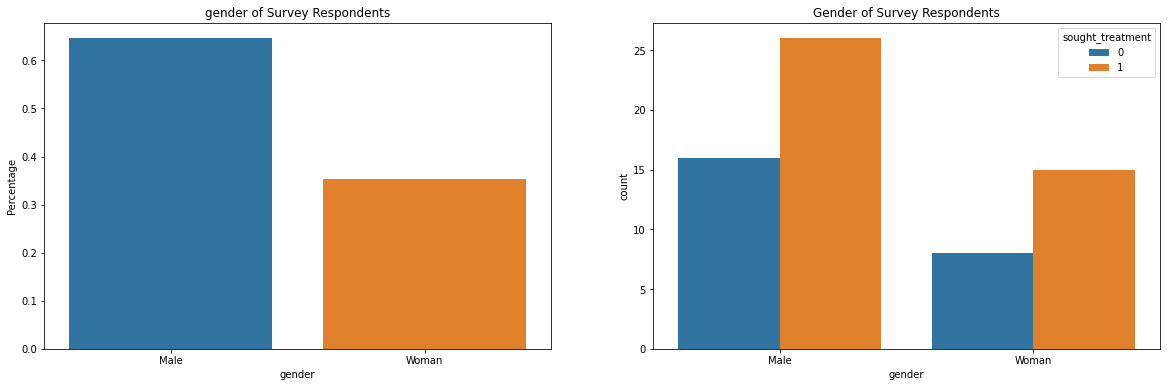

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = us_df['gender'].value_counts(normalize = True).rename_axis('gender').reset_index(name = 'Percentage')
sns.barplot(x = 'gender', y = 'Percentage', data = eda_percentage.head(10))
plt.title('gender of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(us_df['gender'], hue = us_df['sought_treatment'])
plt.title('Gender of Survey Respondents')
plt.show()

MEN: According to the survey respondents, males were more likely to seek treatment that their female counterparts.

**What race has been the most affected by mental illness in the US?**

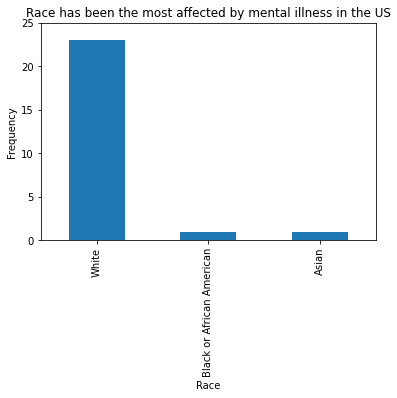

In [ ]:
us_df[us_df['diagnosis_mh'] =='Yes'].groupby('race')['race'].count().sort_values(ascending= False).head().plot.bar().set_ylim([0,25])
plt.title('Race has been the most affected by mental illness in the US')
plt.xlabel("Race")
plt.ylabel("Frequency")
plt.show()


WHITE people were more likely to seek for treatment compared to African American, Asian and other races.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


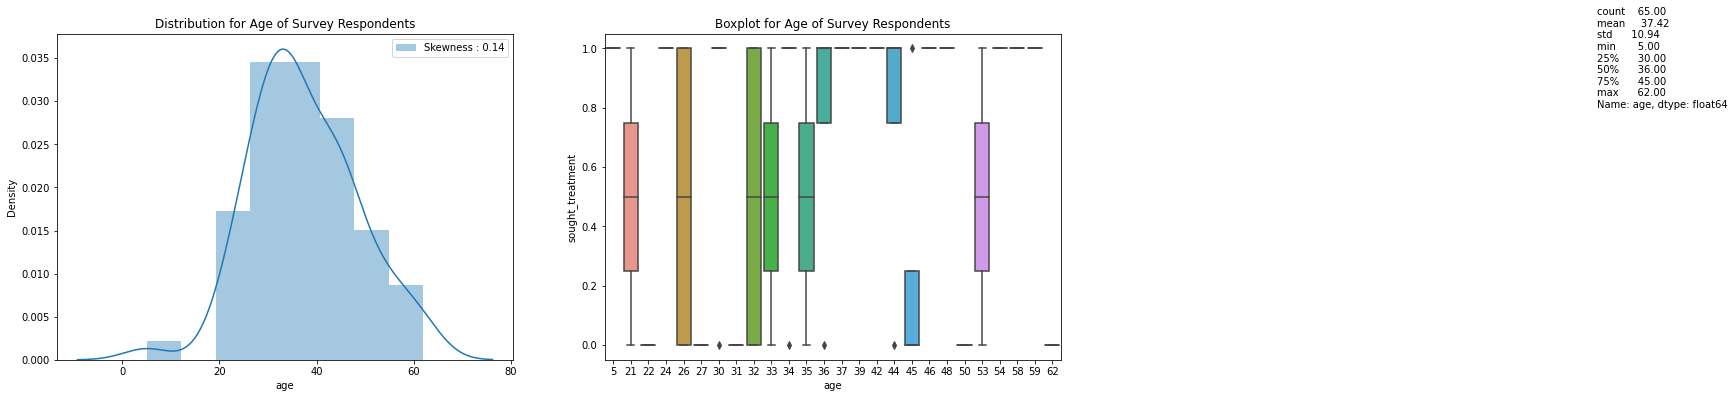

In [ ]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.distplot(us_df['age'], label = 'Skewness : %.2f'%(us_df['age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')
plt.subplot(1,2,2)
sns.boxplot(x = "age", y = "sought_treatment", data = us_df)
plt.title('Boxplot for Age of Survey Respondents')
age = str(us_df['age'].describe().round(2))
plt.text(56, 0.80, age)
plt.show()

Individuals averaging 30 - 33 years of AGE are more likely to seek treatment than other ages.
